In [1]:
# Importing packages 
import os
import pandas as pd 
from __future__ import print_function 

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Finding data on NYC Open Data Portal 

I'll be working with a dataset called _NYPD Motor Vehicle Collisions_ which breakdowns every collision in NYC by location and injury

The dataset can be accessed here: 
https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95




### Downloading data from the portal

In [3]:
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD > water_consumption.csv



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0  1006    0     0   6960      0 --:--:-- --:--:-- --:--:--  6937


In [4]:
# Check if we have an environmental variable "PUIDATA" set up 
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/tm1722/PUIdata


In [5]:
# Move the data
!mv water_consumption.csv $PUIDATA

In [6]:
# Check if the data transferred 
!ls $PUIDATA

water_consumption.csv


### Data mangling using _pandas_

In [8]:
# Read the data with pandas
water_consumption = pd.read_csv("%s/water_consumption.csv"%os.getenv("PUIDATA"))

In [9]:
# Print the first 7 rows of the dataset
water_consumption.head(7)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182


In [10]:
# Look at all variables to decide which ones to keep
water_consumption.columns

Index(['Year', 'New York City Population',
       'NYC Consumption(Million gallons per day)',
       'Per Capita(Gallons per person per day)'],
      dtype='object')

In [14]:
# Count number of rows/data points
water_consumption.size

156

In [29]:
water_consumption_2 = water_consumption[['Per Capita(Gallons per person per day)', 'NYC Consumption(Million gallons per day)']]

In [30]:
water_consumption_2.head()

,Per Capita(Gallons per person per day),NYC Consumption(Million gallons per day)
0,213,1512.0
1,213,1506.0
2,185,1309.0
3,194,1382.0
4,198,1424.0


### Plotting data

Text(0.5,1,'NYC Water Consumption')

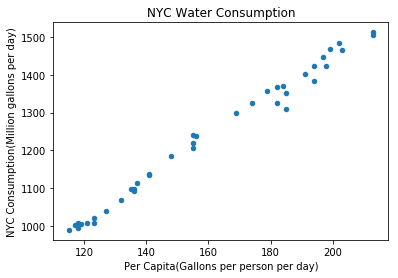

In [31]:
# Plot variables from the new dataframe
water_consumption_2.plot(x='Per Capita(Gallons per person per day)', y='NYC Consumption(Million gallons per day)', kind='scatter')
pylab.title('NYC Water Consumption')

Figure 1: numbers of total NYC water consumptions(in million gallons per day) against per capita consumption (gallons per person per day). Predictably, there is a linear relationship between the variables.